lo que yo mandé a revisión:


# Descomposicion de los Datos

*resumen de la tarea y los objetivos*

**objetivo principal:** funcion que muestra los operadores menos eficaces

**hipotesis:**

- La eficacia estimada de los distintos operadores que utiliza CallMeMaybe es diferente
- Analizar la relación entre la eficacia de un operador y la dirección de llamada
- Analizar la relación entre la eficacia de un operador y si la llamada es interna o externa

**métricas** a encontrar/definir que determinarán la eficacia de un operador frente a otros

- Numero de llamadas entrantes perdidas (internas y externas). A mayor cantidad, menos eficacia.
- Tiempo de espera en llamadas entrantes. A mayor cantidad, menos eficacia.
- Cantidad llamadas salientes. A menor cantidad, menos eficacia.

** Cómo se llevará a cabo el proyecto: **

Parte 1: descargar librerias y paquetes

Parte 2: guardar datos de los datasets y preprocesarlos

- Comprobar la exactitud de los nombres de columnas y renombrar si necesario
- Convertir tipos de datos de columnas para su análisis adecuado
- Estudiar valores ausentes y reemplazar si necesario
- Estudiar valores duplicados y eliminar si necesario
- Estudiar el tipo de correspondencia

Parte 3: Análisis Exploratorio de Datos

- Para cada operador, encuentra el número de llamadas entrante perdidas. Agrupa usando el método groupby(). Traza un gráfico de barras, organizado de mayor a menor.
- Para cada operador, encuentra el tiempo de espera de llamadas entrantes. Primero crea una nueva columna en tu data set donde calcularás el tiempo de espera por llamada, restando del tiempo total de llamada, el tiempo de llamada. Luego utiliza el método groupby(). Realiza un gráfico de barras, organizado de mayor a menor.
- Para cada operador, encuentra la cantidad total de llamdas salientes. Utiliza método groupby(), y realiza un gráfico de barras, organizado de menor a mayor.
- Observa los gráficos y saca conlcusiones de acuerdo a los hallazgos encontrados.

Parte 4: Probar las hipótesis estadísticamente

- Crea dos arrays de datos de llamadas entrantes perdidas para dos operadores. Utiliza una prueba estadística para determinar si la media será igual o diferente.
- De acuerdo al p value, decide si puedes rechazar la hipótesis nula: la media de llamadas entrantes perdidas de los dos operadores será igual.

Parte 5: Conclusiones finales y recomendaciones para CallMeMaybe

- Observa todos tus hallazgos individualmente, y brinda a CallMeMaybe recomendaciones finales respecto a los operadores menos efizaces.
- Incluye enlace a una presentación PDF, junto con documentación o articulos sobre el tema.
- Incluye enlace a tu dashboard, lo cual servirá de herramienta para mostrar los operadores menos eficaces, lo cuál es la tarea y necesidad principal de CallMeMaybe.

*descripcion de los datos, y el significado de cada columna aquí*


# Título aquí

## Introducción

jkjkjljljkl

descripcion de los datos

blablabla

## Paso 1: Descargar librerías y paquetes

In [3]:
# descargar librerías y paquetes

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np


## Paso 2: Guardar datos y Preprocesamiento

In [5]:
# guardar datasets: telecom_clients_us.csv

telecom_clients = pd.read_csv(r"C:\Users\david\Documents\Programacion\Practicum - Data Analyst\TripleTen-Final-Project\EDA Telecomunicaciones\telecom_clients_us.csv")

print(telecom_clients.info())

display(telecom_clients.head(5))

print(telecom_clients.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


             user_id
count     732.000000
mean   167431.927596
std       633.810383
min    166373.000000
25%    166900.750000
50%    167432.000000
75%    167973.000000
max    168606.000000


In [6]:
# convertimos tipos de datos en columna 'date_start' de object a datetime

telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'], format="%Y-%m-%d")

telecom_clients['date_start'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 732 entries, 0 to 731
Series name: date_start
Non-Null Count  Dtype         
--------------  -----         
732 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [7]:
# guardar datasets: telecom_dataset_us.csv

telecom_dataset = pd.read_csv(r"C:\Users\david\Documents\Programacion\Practicum - Data Analyst\TripleTen-Final-Project\EDA Telecomunicaciones\telecom_dataset_us.csv")

print(telecom_dataset.info())

display(telecom_dataset.head(5))

print(telecom_dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


             user_id    operator_id   calls_count  call_duration  \
count   53902.000000   45730.000000  53902.000000   53902.000000   
mean   167295.344477  916535.993002     16.451245     866.684427   
std       598.883775   21254.123136     62.917170    3731.791202   
min    166377.000000  879896.000000      1.000000       0.000000   
25%    166782.000000  900788.000000      1.000000       0.000000   
50%    167162.000000  913938.000000      4.000000      38.000000   
75%    167819.000000  937708.000000     12.000000     572.000000   
max    168606.000000  973286.000000   4817.000000  144395.000000   

       total_call_duration  
count         53902.000000  
mean           1157.133297  
std            4403.468763  
min               0.000000  
25%              47.000000  
50%             210.000000  
75%             902.000000  
max          166155.000000  


In [45]:
# convertimos tipos de datos en columna 'date_start' de object a datetime

telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date'], format="%Y-%m-%d %H:%M:%S%z")  # , format="%Y-%m-%d %H:%M:%S%z"
telecom_dataset['date_only'] = pd.to_datetime((telecom_dataset['date'].dt.date), format="%Y-%m-%d")

# si es necesario, convertir columna 'internal' que está como object, a booleano

# o si es necesario, convertir la columna 'is_missed_call', que está como booleano, a str o object

# convertir columna 'operator_id' de telecom_dataset a category
telecom_dataset['operator_id'] = telecom_dataset['operator_id'].astype('category')

#comprueba
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  int64                    
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          45730 non-null  category                 
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
 9   date_only            53902 non-null  datetime64[ns]           
dtypes: bool(1), category(1), datetime64[ns, UTC+03:00](1), datetime64[ns](

In [6]:
# lidiar con ausentes en dataset telecom_dataset, en las columnas internal y operator_id

print('\nValores ausentes en la columna internal:')

display(telecom_dataset[telecom_dataset['internal'].isna() == True])

print('\nValores ausentes en la columna operator_id:')

display(telecom_dataset[telecom_dataset['operator_id'].isna() == True])



Valores ausentes en la columna internal:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_only
1007,166405,2019-09-18 00:00:00+03:00,in,NaN,NaN,True,1,0,59,2019-09-18
1090,166405,2019-10-01 00:00:00+03:00,in,NaN,NaN,True,1,0,1,2019-10-01
1864,166406,2019-08-20 00:00:00+03:00,in,NaN,NaN,True,1,0,36,2019-08-20
1924,166406,2019-09-02 00:00:00+03:00,in,NaN,879898.0,False,1,2,9,2019-09-02
6210,166541,2019-09-26 00:00:00+03:00,in,NaN,908960.0,False,1,393,423,2019-09-26
...,...,...,...,...,...,...,...,...,...,...
52462,168361,2019-11-09 00:00:00+03:00,in,NaN,NaN,True,6,0,14,2019-11-09
52590,168361,2019-11-13 00:00:00+03:00,in,NaN,NaN,True,2,0,6,2019-11-13
52621,168361,2019-11-14 00:00:00+03:00,in,NaN,NaN,True,1,0,2,2019-11-14
53717,168579,2019-11-09 00:00:00+03:00,in,NaN,NaN,True,1,0,18,2019-11-09



Valores ausentes en la columna operator_id:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_only
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,2019-08-04
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35,2019-08-05
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62,2019-08-06
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24,2019-08-07
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34,2019-08-12
...,...,...,...,...,...,...,...,...,...,...
53876,168601,2019-11-27 00:00:00+03:00,in,False,NaN,True,2,0,39,2019-11-27
53880,168601,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,19,2019-11-28
53889,168603,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,30,2019-11-28
53893,168606,2019-11-08 00:00:00+03:00,in,False,NaN,True,6,0,121,2019-11-08


In [7]:
# valores duplicados 

# telecom_clients

print('Filas duplicadas en dataset telecom_clients:')
display(telecom_clients[telecom_clients.duplicated() == True])

# telecom_dataset

print('Filas duplicadas en dataset telecom_dataset:')
display(telecom_dataset[telecom_dataset[['user_id','date','direction','internal','operator_id','is_missed_call','calls_count','call_duration','total_call_duration']].duplicated() == True])

Filas duplicadas en dataset telecom_clients:


,user_id,tariff_plan,date_start


Filas duplicadas en dataset telecom_dataset:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_only
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50,2019-08-05
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34,2019-08-12
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654,2019-08-14
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3,2019-08-14
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473,2019-08-15
...,...,...,...,...,...,...,...,...,...,...
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282,2019-11-25
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562,2019-11-26
53875,168601,2019-11-26 00:00:00+03:00,in,False,NaN,True,3,0,35,2019-11-26
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0,89,2019-11-20


In [8]:
# estudiar correlaciones en ambos datasets

# telecom_dataset

telecom_dataset[['calls_count','call_duration','total_call_duration']].corr()


,calls_count,call_duration,total_call_duration
calls_count,1.000000,0.511792,0.636757
call_duration,0.511792,1.000000,0.975019
total_call_duration,0.636757,0.975019,1.000000


**Conclusiones: **

- sobre tipo de datos: 
- sobre los ausentes: 
- sobre duplicados: 



## Paso 3: Análisis exploratorio de datos

- Para cada operador, encuentra el número de llamadas entrante perdidas. Agrupa usando el método groupby(). Traza un gráfico de barras, organizado de mayor a menor.
- Para cada operador, encuentra el tiempo de espera de llamadas entrantes. Primero crea una nueva columna en tu data set donde calcularás el tiempo de espera por llamada, restando del tiempo total de llamada, el tiempo de llamada. Luego utiliza el método groupby(). Realiza un gráfico de barras, organizado de mayor a menor.
- Para cada operador, encuentra la cantidad total de llamdas salientes. Utiliza método groupby(), y realiza un gráfico de barras, organizado de menor a mayor.
- Observa los gráficos y saca conlcusiones de acuerdo a los hallazgos encontrados.


### Llamadas perdidas por operador

In [47]:
# Para cada operador, encuentra el número de llamadas entrante perdidas. Agrupa usando el método groupby(). 

in_missed_calls = (
    telecom_dataset[(telecom_dataset['is_missed_call'] == True) & (telecom_dataset['direction'] == 'in')]
    .groupby('operator_id').agg({'calls_count':'sum'})
    .sort_values(by='calls_count',ascending = False)
    .rename(columns={'calls_count':'missed_calls_count'})
    .reset_index()
)

display(in_missed_calls.head())

,operator_id,missed_calls_count
0,913942.0,55
1,944226.0,38
2,944216.0,32
3,940588.0,30
4,885890.0,27


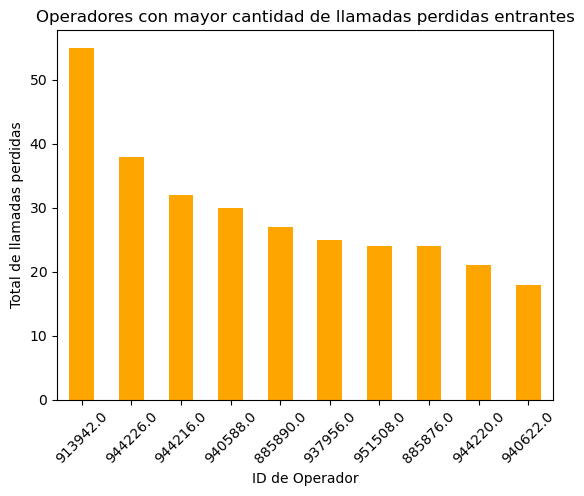

In [72]:
# Traza un gráfico de barras, organizado de mayor a menor.

in_missed_calls_graph = in_missed_calls.head(10)

in_missed_calls_graph.plot(
    kind = 'bar',
    x= 'operator_id',
    y= 'missed_calls_count',
    title = 'Operadores con mayor cantidad de llamadas perdidas entrantes',
    xlabel = 'ID de Operador',
    ylabel = 'Total de llamadas perdidas',
    color = 'orange',
    legend = False,
    rot = 45
)

plt.show()


### Tiempo de espera de llamadas entrantes promedio por operador

In [80]:
# Para cada operador, encuentra el tiempo de espera de llamadas entrantes. 

# Creamos una nueva columna en el dataset telecom_dataset para el tiempo de espera
# restando del tiempo total de llamada, el tiempo de llamada. 
telecom_dataset['call_wait_duration'] = telecom_dataset['total_call_duration'] - telecom_dataset['call_duration']

# Luego utiliza el método groupby(). 

waiting_time_in_calls = (
    telecom_dataset[telecom_dataset['direction'] == 'in']
    .groupby('operator_id').agg({'call_wait_duration':'mean'})
    .sort_values(by='call_wait_duration',ascending = False)
    .rename(columns={'call_wait_duration':'call_wait_average'})
    .reset_index()
)

waiting_time_in_calls = waiting_time_in_calls.dropna()

waiting_time_in_calls['call_wait_average'] = waiting_time_in_calls['call_wait_average'].astype('int')

display(waiting_time_in_calls.head())

,operator_id,call_wait_average
0,919794.0,1039
1,906070.0,853
2,919790.0,839
3,931458.0,655
4,906076.0,611


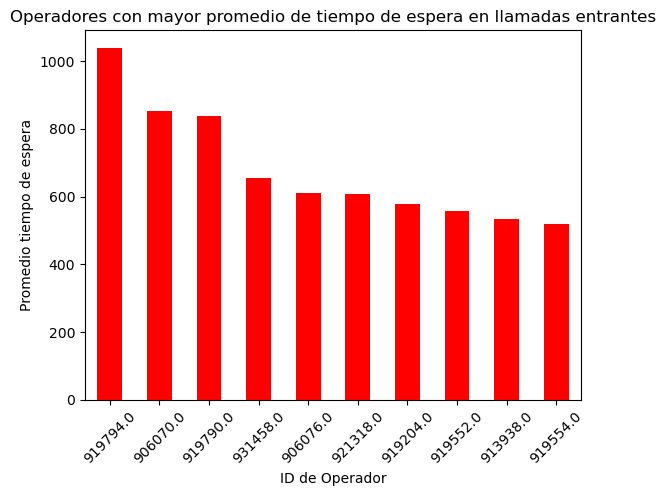

In [82]:
# Realiza un gráfico de barras, organizado de mayor a menor.

waiting_time_in_calls_graph = waiting_time_in_calls.head(10)

waiting_time_in_calls_graph.plot(
    kind = 'bar',
    x= 'operator_id',
    y= 'call_wait_average',
    title = 'Operadores con mayor promedio de tiempo de espera en llamadas entrantes',
    xlabel = 'ID de Operador',
    ylabel = 'Promedio tiempo de espera',
    color = 'red',
    legend = False,
    rot = 45
)

plt.show()

### Cantidad total de lllamadas salientes por operador

In [85]:
# Para cada operador, encuentra la cantidad total de llamdas salientes. Utiliza método groupby()

out_calls_total = (
    telecom_dataset[telecom_dataset['direction'] == 'out']
    .groupby('operator_id').agg({'calls_count':'sum'})
    .sort_values(by='calls_count',ascending = True)
    .rename(columns={'calls_count':'total_out_calls'})
    .reset_index()
)

display(out_calls_total.head())

,operator_id,total_out_calls
0,973286.0,0
1,932460.0,0
2,931914.0,0
3,930818.0,0
4,901350.0,0


In [88]:
# Visualiza todos los operadores que no realizan llamadas salientes

out_calls_total[out_calls_total['total_out_calls'] == 0]

,operator_id,total_out_calls
0,973286.0,0
1,932460.0,0
2,931914.0,0
3,930818.0,0
4,901350.0,0
...,...,...
205,895786.0,0
206,940514.0,0
207,951118.0,0
208,882476.0,0


## Parte 4: Probar las hipótesis estadísticamente

Vamos a usar una prueba estadística para evaluar la siguiente hipótesis: la media de llamadas entrantes perdidas de los dos operadores será igual.

Vamos a tomar los dos operadores que más cantidad de llamadas perdidas tiene, según el analisis anterior: 

Operador 913942.0 - Llamadas perdidas 55
Operador 944226.0 - Llamadas perdidas 38

Establecemos alpha = 0.5


In [106]:
# Crea dos arrays de datos de llamadas entrantes perdidas para dos operadores.

operator_913942 = np.array(telecom_dataset[(telecom_dataset['direction'] == 'in') & (telecom_dataset['is_missed_call'] == True) & (telecom_dataset['operator_id'] == 913942.0)]['calls_count'])
operator_944226 = np.array(telecom_dataset[(telecom_dataset['direction'] == 'in') & (telecom_dataset['is_missed_call'] == True) & (telecom_dataset['operator_id'] == 944226.0)]['calls_count'])

# Utiliza una prueba estadística para determinar si la media será igual o diferente.

alpha = 0.5

results = st.ttest_ind(operator_913942, operator_944226)

# resultados t_test

print('valor p:', results.pvalue)
# tu código: imprime el valor p obtenido

# su código: compara los valores p obtenidos con el nivel de significación estadística
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.27635761691671784
Rechazamos la hipótesis nula


## Parte 5: Conclusiones finales y recomendaciones para CallMeMaybe

Observa todos tus hallazgos individualmente, y brinda a CallMeMaybe recomendaciones finales respecto a los operadores menos efizaces.
Incluye enlace a una presentación PDF, junto con documentación o articulos sobre el tema.
Incluye enlace a tu dashboard, lo cual servirá de herramienta para mostrar los operadores menos eficaces, lo cuál es la tarea y necesidad principal de CallMeMaybe.

#  PLAYGROUND